## Mutual Fund 10 Year Returns 

Group: Jack Boydell, Luke Werkmeister-Martin, Hayden Vaughn, Ben Jaffe, Ben Kowalski

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [55]:
dataframe = pd.read_csv('Mutual Funds.csv')
mutual_funds = dataframe.copy()
print(mutual_funds.head())

  fund_symbol                                 fund_extended_name  \
0       AAAAX               DWS RREEF Real Assets Fund - Class A   
1       AAADX               Aberdeen Income Builder Fund Class A   
2       AAAGX             Thrivent Large Cap Growth Fund Class A   
3       AAAIX  American Century Strategic Allocation: Aggress...   
4       AAANX  Horizon Active Asset Allocation Fund Investor ...   

                    fund_family inception_date  \
0                           DWS     2007-07-29   
1                      Aberdeen     2011-12-29   
2                Thrivent Funds     1999-10-28   
3  American Century Investments     2000-07-31   
4           Horizon Investments     2012-01-30   

                         category  rating  return_rating  risk_rating  \
0                World Allocation     3.0            3.0          3.0   
1  Allocation - 50% to 70% Equity     4.0            5.0          5.0   
2                    Large Growth     3.0            3.0          4.0  

/Users/haydenvaughn/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (167,171) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [56]:
# only selecting columns from the dataset that will  be used in analysis
mutual_funds = mutual_funds[['fund_symbol', 'fund_extended_name', 'fund_family', 'inception_date', 'category', 'rating', 'return_rating', 'risk_rating', 'investment_strategy', 'investment_type', 'size_type','sector_basic_materials','sector_consumer_cyclical', 'sector_financial_services', 'sector_real_estate', 'sector_consumer_defensive', 'sector_healthcare', 'sector_utilities', 'sector_communication_services', 'sector_energy', 'sector_industrials','sector_technology', 'fund_yield', 'fund_return_ytd', 'fund_return_10years']]
print(mutual_funds.shape)

# checking for and dropping duplicates and Null values
mutual_funds = mutual_funds.drop_duplicates()
mutual_funds = mutual_funds.dropna()

print(f'Dimensions after cleaning: {mutual_funds.shape}')

(24821, 25)
Dimensions after cleaning: (13049, 25)


In [57]:
cut_bins = [-1, 10, 20, 100]
cut_labels = ["Low", "Medium", "High"]

#Binning the different sectors
mutual_funds["basic_materials_bin"]= pd.cut(mutual_funds['sector_basic_materials'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["consumer_cyclical_bin"]= pd.cut(mutual_funds['sector_consumer_cyclical'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["financial_services_bin"]= pd.cut(mutual_funds['sector_financial_services'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["real_estate_bin"]= pd.cut(mutual_funds['sector_real_estate'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["consumer_defensive_bin"]= pd.cut(mutual_funds['sector_consumer_defensive'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["healthcare_bin"]= pd.cut(mutual_funds['sector_healthcare'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["utilities_bin"]= pd.cut(mutual_funds['sector_utilities'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["communication_services_bin"]= pd.cut(mutual_funds['sector_communication_services'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["energy_bin"]= pd.cut(mutual_funds['sector_energy'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["industrials_bin"]= pd.cut(mutual_funds['sector_industrials'],
                                          bins= cut_bins, labels= cut_labels)

mutual_funds["technology_bin"]= pd.cut(mutual_funds['sector_technology'],
                                          bins= cut_bins, labels= cut_labels)

                 fund_return_10years
investment_type                     
Blend                       7.246532
Growth                     11.354956
Value                       5.799672


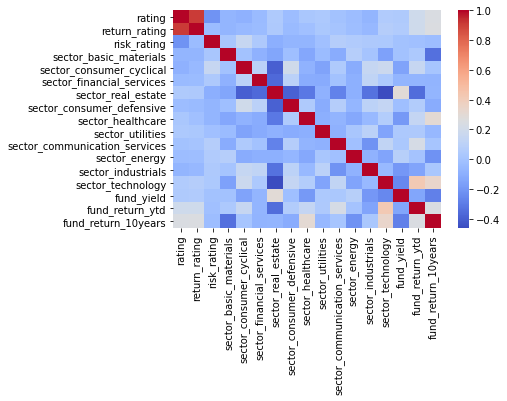

In [58]:
#grouping dataset by investment_type ('Growth', 'Value', 'Blend') for stratified sampling 
mutual_funds_by_type = mutual_funds.groupby('investment_type')[['fund_return_10years']].mean()
print(mutual_funds_by_type)

# random_state set to 1 for reproducibility
n_sample = 3000 #how many of each of three investment types we want
full_sample_df = mutual_funds.groupby('investment_type').apply(lambda x: x.sample(n_sample, random_state=1))
full_sample_df.head(3001)

#splitting up full dataframe sample by three investment types 
mutual_funds_Value = full_sample_df[full_sample_df['investment_type'] == 'Value']

#Visualising the data using heatmap
#plt.figure()
#sns.heatmap(mutual_funds_Value.corr(),cmap='coolwarm')
#plt.show()
#print(mutual_funds_Value.shape)

mutual_funds_Growth = full_sample_df[full_sample_df['investment_type'] == 'Growth']
#print(mutual_funds_Growth.shape)

mutual_funds_Blend = full_sample_df[full_sample_df['investment_type'] == 'Blend']
#print(mutual_funds_Blend.shape)

plt.figure()
sns.heatmap(mutual_funds_Blend.corr(),cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='sector_technology', ylabel='fund_return_10years'>

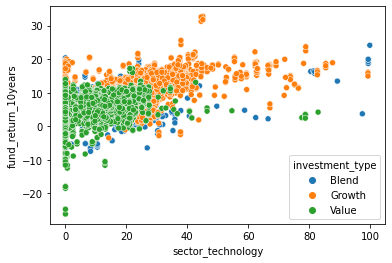

In [59]:
sns.scatterplot(x='sector_technology', y='fund_return_10years', data=full_sample_df, hue='investment_type')

In [60]:
# splitting each stratified sample data frame into testing/training sets
test_set_proportion = 0.25

# random state set to 1 for reproducibility
Value_train, Value_test = train_test_split(mutual_funds_Value, test_size = test_set_proportion, random_state=1)

Growth_train, Growth_test = train_test_split(mutual_funds_Growth, test_size = test_set_proportion, random_state=1)

Blend_train, Blend_test = train_test_split(mutual_funds_Blend, test_size = test_set_proportion, random_state=1)

#print(Growth_train.head())

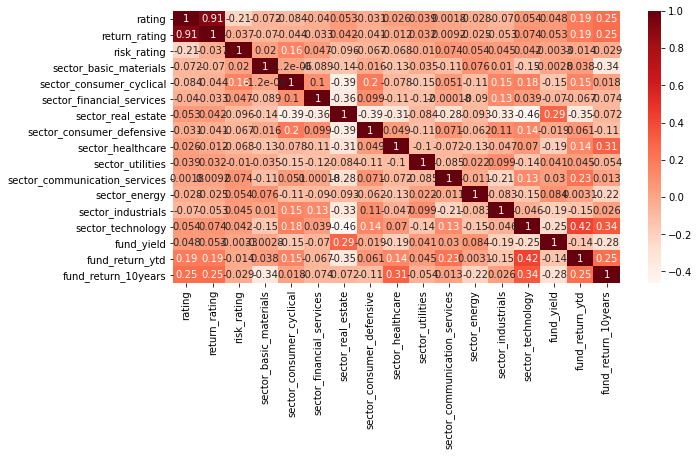

In [61]:
#Using Pearson Correlation
plt.figure(figsize=(10,5)) #(changed from (12,10))
cor = mutual_funds_Blend.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

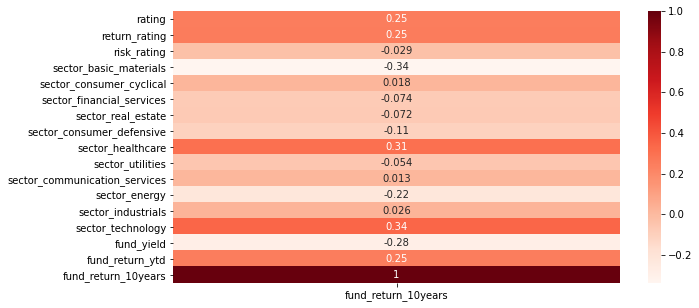

In [74]:
#Using Pearson Correlation
plt.figure(figsize=(10,5)) #(changed from (12,10))
cor = mutual_funds_Blend.corr()
response_column = pd.DataFrame(cor['fund_return_10years'])
sns.heatmap(response_column, annot=True, cmap=plt.cm.Reds)
plt.show()

In [62]:
#Correlation with output variable
cor_target = abs(cor["fund_return_10years"]) # absolute value
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

sector_basic_materials    0.338678
sector_healthcare         0.307685
sector_technology         0.343153
fund_return_10years       1.000000
Name: fund_return_10years, dtype: float64

In [63]:
print(mutual_funds_Blend[["sector_basic_materials","sector_technology"]].corr()) # low correlation with each other so they are independent

                        sector_basic_materials  sector_technology
sector_basic_materials                1.000000          -0.153138
sector_technology                    -0.153138           1.000000


                             OLS Regression Results                            
Dep. Variable:     fund_return_10years   R-squared:                       0.122
Model:                             OLS   Adj. R-squared:                  0.121
Method:                  Least Squares   F-statistic:                     104.3
Date:                 Wed, 28 Apr 2021   Prob (F-statistic):           3.15e-63
Time:                         22:44:16   Log-Likelihood:                -5796.3
No. Observations:                 2250   AIC:                         1.160e+04
Df Residuals:                     2246   BIC:                         1.162e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
size_type[Large]      4.7506

<AxesSubplot:xlabel='sector_healthcare', ylabel='fund_return_10years'>

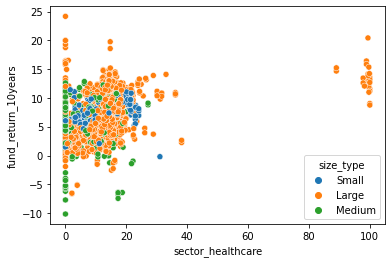

In [68]:
#initial linear regression model testing
practice_model_healthcare = ols('fund_return_10years ~ sector_healthcare + size_type + 0', data=Blend_train).fit()
print(practice_model.summary())

#checking residuals (manually) for model predicitng in test set
#pred = practice_model.predict(Blend_test['sector_basic_materials'])
#print(pred - Blend_test['fund_return_10years'])

sns.scatterplot(x= 'sector_healthcare', y= 'fund_return_10years', data=mutual_funds_Blend, hue='size_type')

                             OLS Regression Results                            
Dep. Variable:     fund_return_10years   R-squared:                       0.122
Model:                             OLS   Adj. R-squared:                  0.121
Method:                  Least Squares   F-statistic:                     104.3
Date:                 Wed, 28 Apr 2021   Prob (F-statistic):           3.15e-63
Time:                         22:44:42   Log-Likelihood:                -5796.3
No. Observations:                 2250   AIC:                         1.160e+04
Df Residuals:                     2246   BIC:                         1.162e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
size_type[Large]      4.7506

<AxesSubplot:xlabel='sector_basic_materials', ylabel='fund_return_10years'>

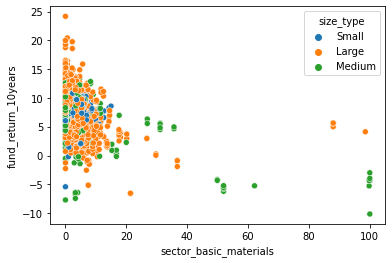

In [70]:
#initial linear regression model testing
practice_model_basic = ols('fund_return_10years ~ sector_basic_materials + size_type + 0', data=Blend_train).fit()
print(practice_model.summary())

#checking residuals (manually) for model predicitng in test set
#pred = practice_model.predict(Blend_test['sector_basic_materials'])
#print(pred - Blend_test['fund_return_10years'])

sns.scatterplot(x= 'sector_basic_materials', y= 'fund_return_10years', data=mutual_funds_Blend, hue='size_type')

                             OLS Regression Results                            
Dep. Variable:     fund_return_10years   R-squared:                       0.122
Model:                             OLS   Adj. R-squared:                  0.121
Method:                  Least Squares   F-statistic:                     104.3
Date:                 Wed, 28 Apr 2021   Prob (F-statistic):           3.15e-63
Time:                         22:44:30   Log-Likelihood:                -5796.3
No. Observations:                 2250   AIC:                         1.160e+04
Df Residuals:                     2246   BIC:                         1.162e+04
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
size_type[Large]      4.7506

<AxesSubplot:xlabel='sector_technology', ylabel='fund_return_10years'>

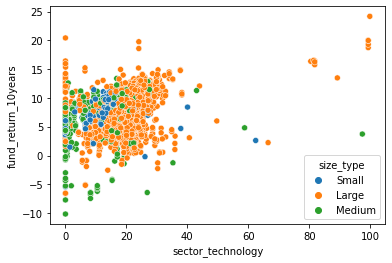

In [69]:
#initial linear regression model testing
practice_model_technology = ols('fund_return_10years ~ sector_technology + size_type + 0', data=Blend_train).fit()
print(practice_model.summary())

#checking residuals (manually) for model predicitng in test set
#pred = practice_model.predict(Blend_test['sector_basic_materials'])
#print(pred - Blend_test['fund_return_10years'])

sns.scatterplot(x= 'sector_technology', y= 'fund_return_10years', data=mutual_funds_Blend, hue='size_type')

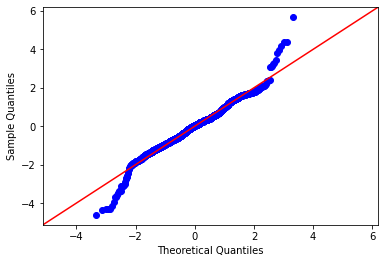

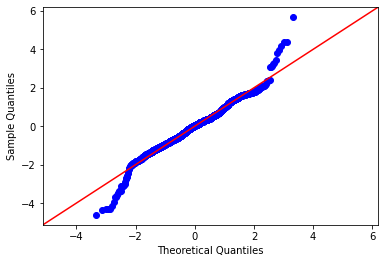

In [71]:
from statsmodels.api import qqplot
qqplot(data=practice_model_healthcare.resid, fit=True, line="45")



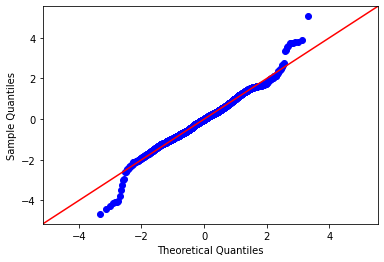

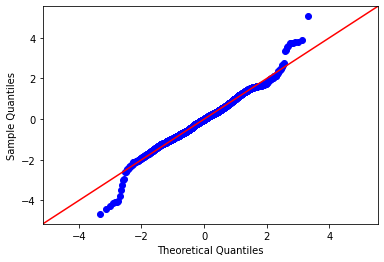

In [72]:
qqplot(data=practice_model_basic.resid, fit=True, line="45")

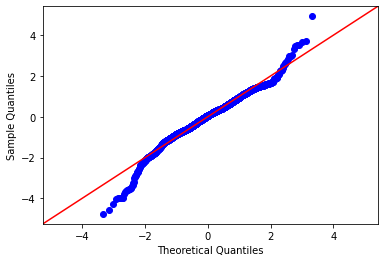

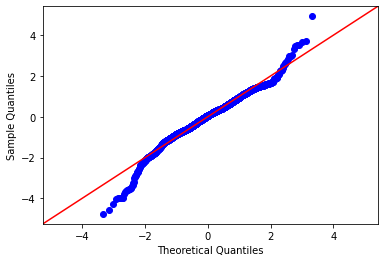

In [73]:
qqplot(data=practice_model_technology.resid, fit=True, line="45")